In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electoral-bond-data-state-bank-of-india/EncashmentData.csv
/kaggle/input/electoral-bond-data-state-bank-of-india/PurchaseData.csv


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [33]:
data = pd.read_csv(r"/kaggle/input/electoral-bond-data-state-bank-of-india/EncashmentData.csv")

In [34]:
data

,Date of\nEncashment,Name of the Political Party,Denomination
0,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
1,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
2,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000.0
3,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
4,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
...,...,...,...
20841,24-Jan-24,JANASENA PARTY,1000000.0
20842,24-Jan-24,JANASENA PARTY,1000000.0
20843,24-Jan-24,JANASENA PARTY,1000000.0
20844,24-Jan-24,JANASENA PARTY,1000000.0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20846 entries, 0 to 20845
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date of
Encashment           20421 non-null  object 
 1   Name of the Political Party  20421 non-null  object 
 2   Denomination                 20421 non-null  float64
dtypes: float64(1), object(2)
memory usage: 488.7+ KB


In [36]:
data.head()

,Date of\nEncashment,Name of the Political Party,Denomination
0,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
1,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
2,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000.0
3,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
4,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0


In [37]:
data.tail()

,Date of\nEncashment,Name of the Political Party,Denomination
20841,24-Jan-24,JANASENA PARTY,1000000.0
20842,24-Jan-24,JANASENA PARTY,1000000.0
20843,24-Jan-24,JANASENA PARTY,1000000.0
20844,24-Jan-24,JANASENA PARTY,1000000.0
20845,24-Jan-24,JANASENA PARTY,1000000.0


In [38]:
data.columns

Index(['Date of\nEncashment', 'Name of the Political Party', 'Denomination'], dtype='object')

In [39]:
data_BJP = data[data["Name of the Political Party"] == "BHARTIYA JANTA PARTY"]

In [40]:
data_BJP

,Date of\nEncashment,Name of the Political Party,Denomination
61,12-Apr-19,BHARTIYA JANTA PARTY,1000000.0
62,12-Apr-19,BHARTIYA JANTA PARTY,1000000.0
63,12-Apr-19,BHARTIYA JANTA PARTY,1000000.0
64,12-Apr-19,BHARTIYA JANTA PARTY,1000000.0
65,12-Apr-19,BHARTIYA JANTA PARTY,10000000.0
...,...,...,...
20831,24-Jan-24,BHARTIYA JANTA PARTY,10000000.0
20832,24-Jan-24,BHARTIYA JANTA PARTY,10000000.0
20833,24-Jan-24,BHARTIYA JANTA PARTY,10000000.0
20834,24-Jan-24,BHARTIYA JANTA PARTY,10000000.0


In [47]:
data_INC = data[data["Name of the Political Party"] == "PRESIDENT, ALL INDIA CONGRESS COMMITTEE"]

In [48]:
data_INC

,Date of\nEncashment,Name of the Political Party,Denomination
471,12-Apr-19,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",1000000.0
472,12-Apr-19,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",10000000.0
473,12-Apr-19,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",10000000.0
474,12-Apr-19,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",1000000.0
475,12-Apr-19,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",1000000.0
...,...,...,...
20800,22-Jan-24,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",1000000.0
20801,22-Jan-24,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",1000000.0
20802,22-Jan-24,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",1000000.0
20803,22-Jan-24,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",1000000.0


In [42]:
data["Name of the Political Party"].value_counts()

Name of the Political Party
BHARTIYA JANTA PARTY                              8633
ALL INDIA TRINAMOOL CONGRESS                      3305
PRESIDENT, ALL INDIA CONGRESS COMMITTEE           3146
BHARAT RASHTRA SAMITHI                            1806
BIJU JANATA DAL                                    861
DMK PARTY IN PARLIAMENT                            648
YSR CONGRESS PARTY (YUVAJANA SRAMIKA R             472
SHIVSENA (POLITICAL PARTY)                         354
TELUGU DESAM PARTY                                 279
AAM AADMI PARTY                                    245
RASTRIYA JANTA DAL                                 149
NATIONALIST CONGRESS PARTY PARLIAMENT OF           116
JANATA DAL ( SECULAR )                              75
SIKKIM KRANTIKARI MORCHA                            50
ADYAKSHA SAMAJVADI PARTY                            46
JHARKHAND MUKTI MORCHA                              45
JANASENA PARTY                                      39
ALL INDIA ANNA DRAVIDA MUNNETRA KAZHA

/tmp/ipykernel_34/3801622309.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data_BJP["Denomination"] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Denomination', ylabel='Density'>

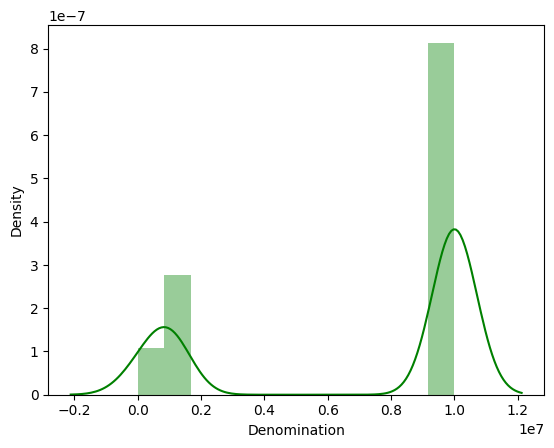

In [49]:
sn.distplot(data_BJP["Denomination"] , color = "green")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Denomination'>

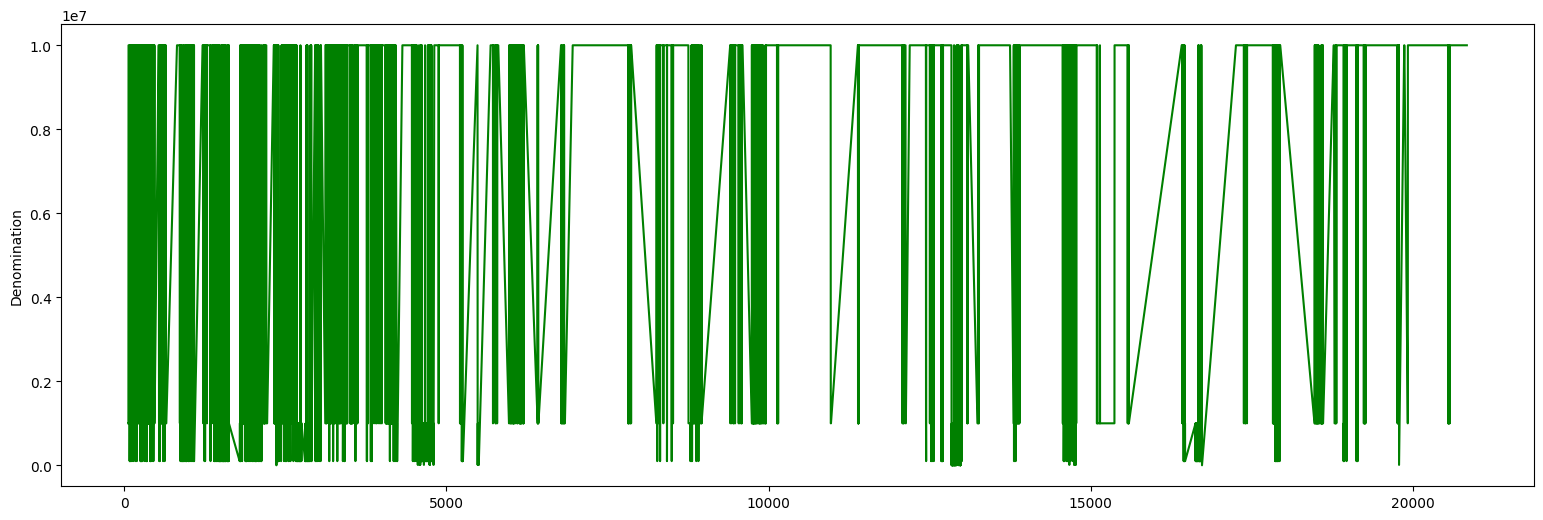

In [51]:
plt.figure(figsize = (19,6))
sn.lineplot(data_BJP["Denomination"] , color = "green")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Denomination')

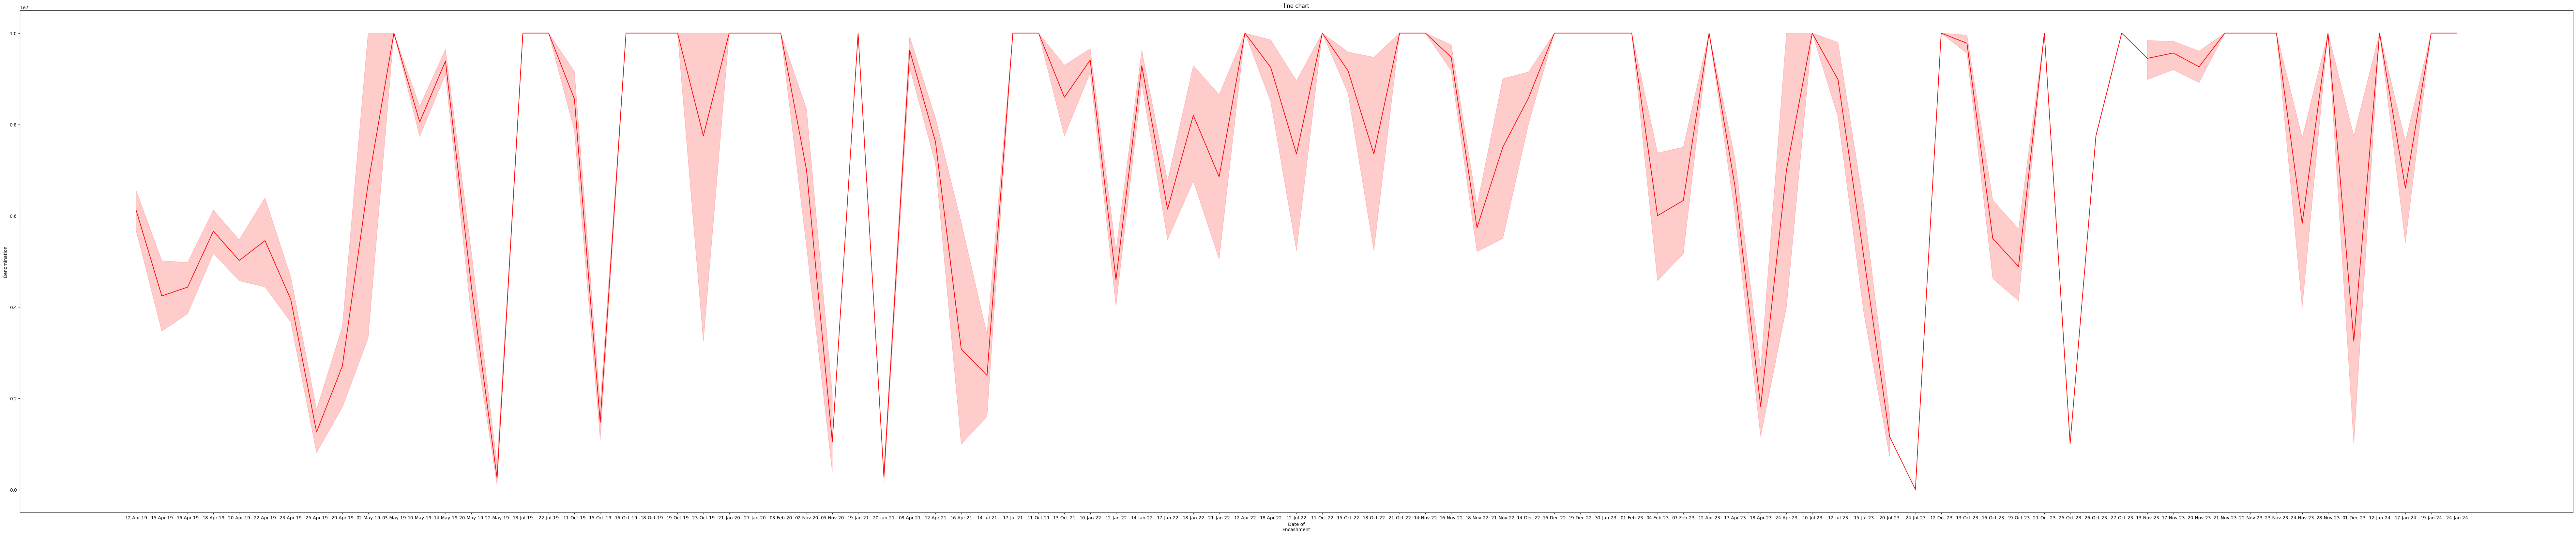

In [57]:
plt.figure(figsize = (101,20))
sn.lineplot(x = "Date of\nEncashment" , y = "Denomination" , data = data_BJP , color = "red")
plt.title("line chart")
plt.xlabel("Date of\nEncashment")
plt.ylabel("Denomination")

<Axes: xlabel='Name of the Political Party', ylabel='count'>

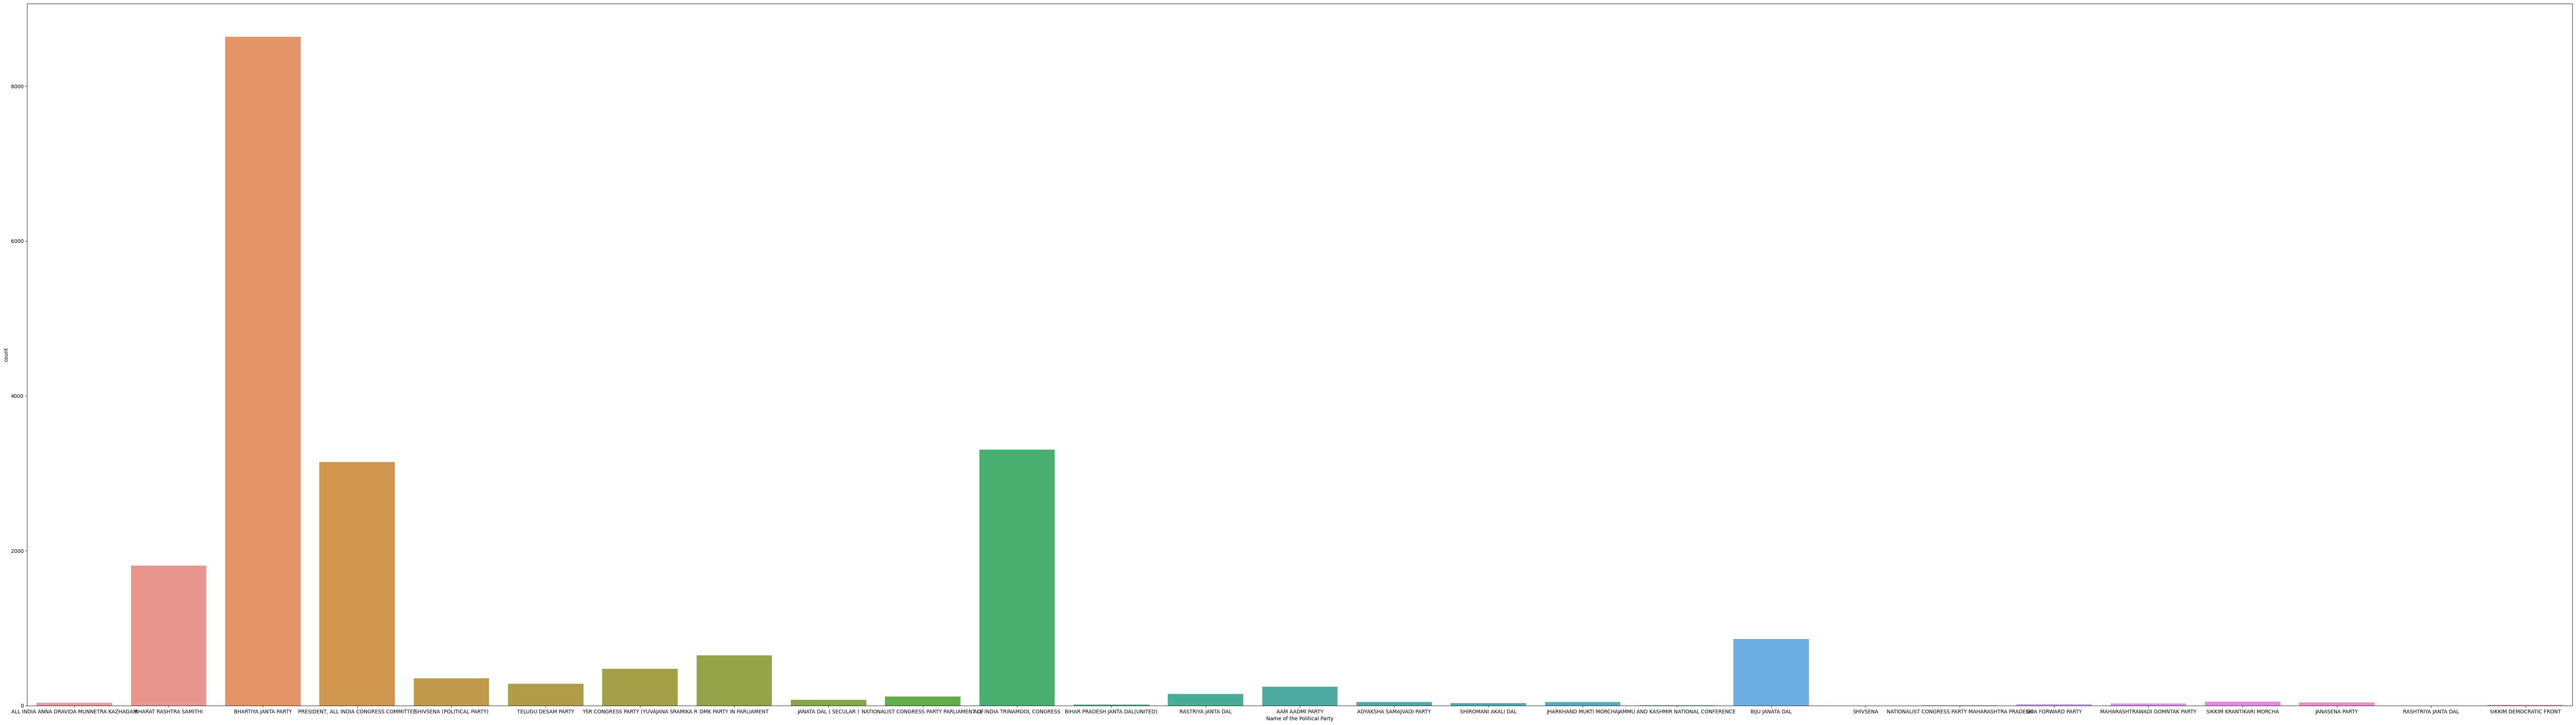

In [69]:
plt.figure(figsize = (90 , 25))
sn.countplot(x = "Name of the Political Party", data = data)

<Axes: xlabel='Name of the Political Party', ylabel='Denomination'>

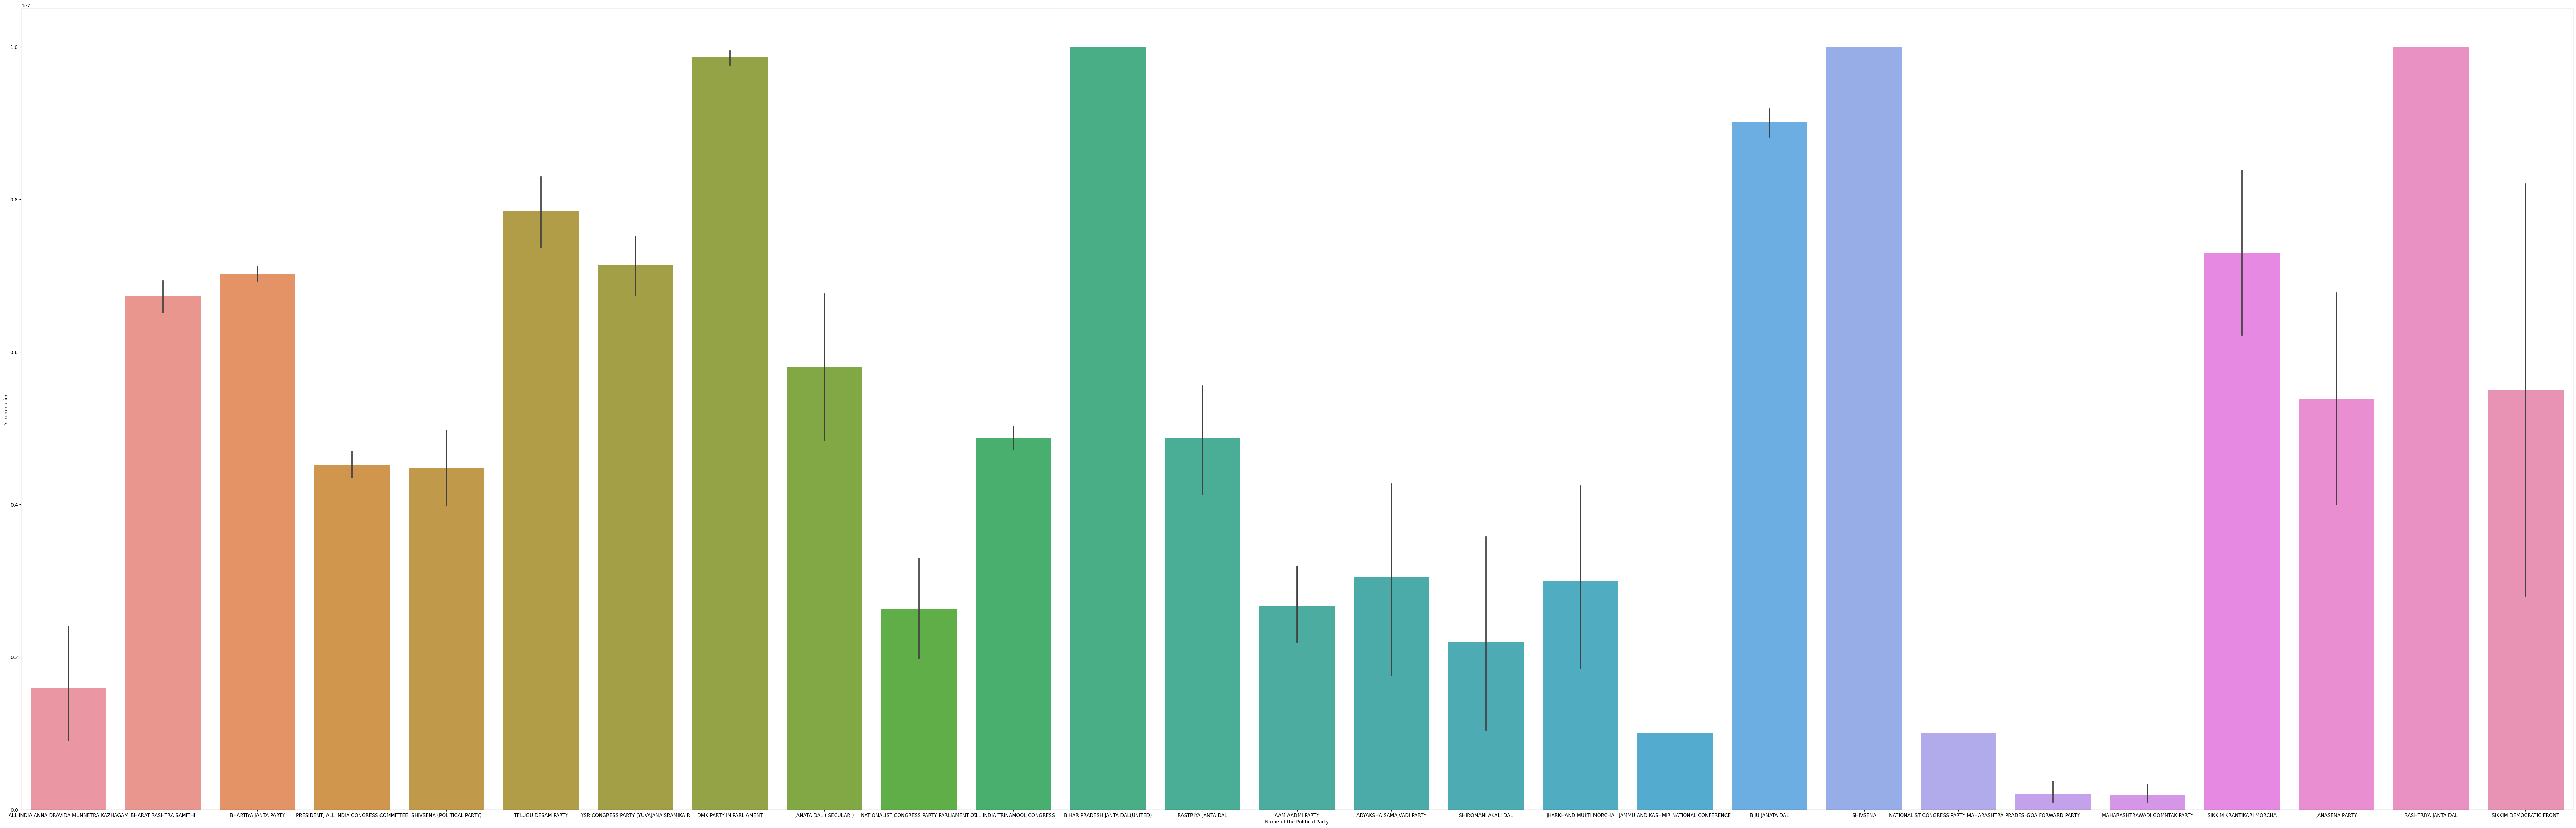

In [71]:

plt.figure(figsize = (95,30))
sn.barplot(x = "Name of the Political Party" , y = "Denomination" , data = data)

In [73]:
data_DMK_PARTY_IN_PARLIAMENT = data[data["Name of the Political Party"] == "DMK PARTY IN PARLIAMENT"]

In [74]:
data_DMK_PARTY_IN_PARLIAMENT

,Date of\nEncashment,Name of the Political Party,Denomination
653,15-Apr-19,DMK PARTY IN PARLIAMENT,10000000.0
654,15-Apr-19,DMK PARTY IN PARLIAMENT,10000000.0
655,15-Apr-19,DMK PARTY IN PARLIAMENT,10000000.0
656,15-Apr-19,DMK PARTY IN PARLIAMENT,10000000.0
657,15-Apr-19,DMK PARTY IN PARLIAMENT,10000000.0
...,...,...,...
20824,23-Jan-24,DMK PARTY IN PARLIAMENT,10000000.0
20825,23-Jan-24,DMK PARTY IN PARLIAMENT,10000000.0
20826,23-Jan-24,DMK PARTY IN PARLIAMENT,10000000.0
20827,23-Jan-24,DMK PARTY IN PARLIAMENT,10000000.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date of\nEncashment', ylabel='Denomination'>

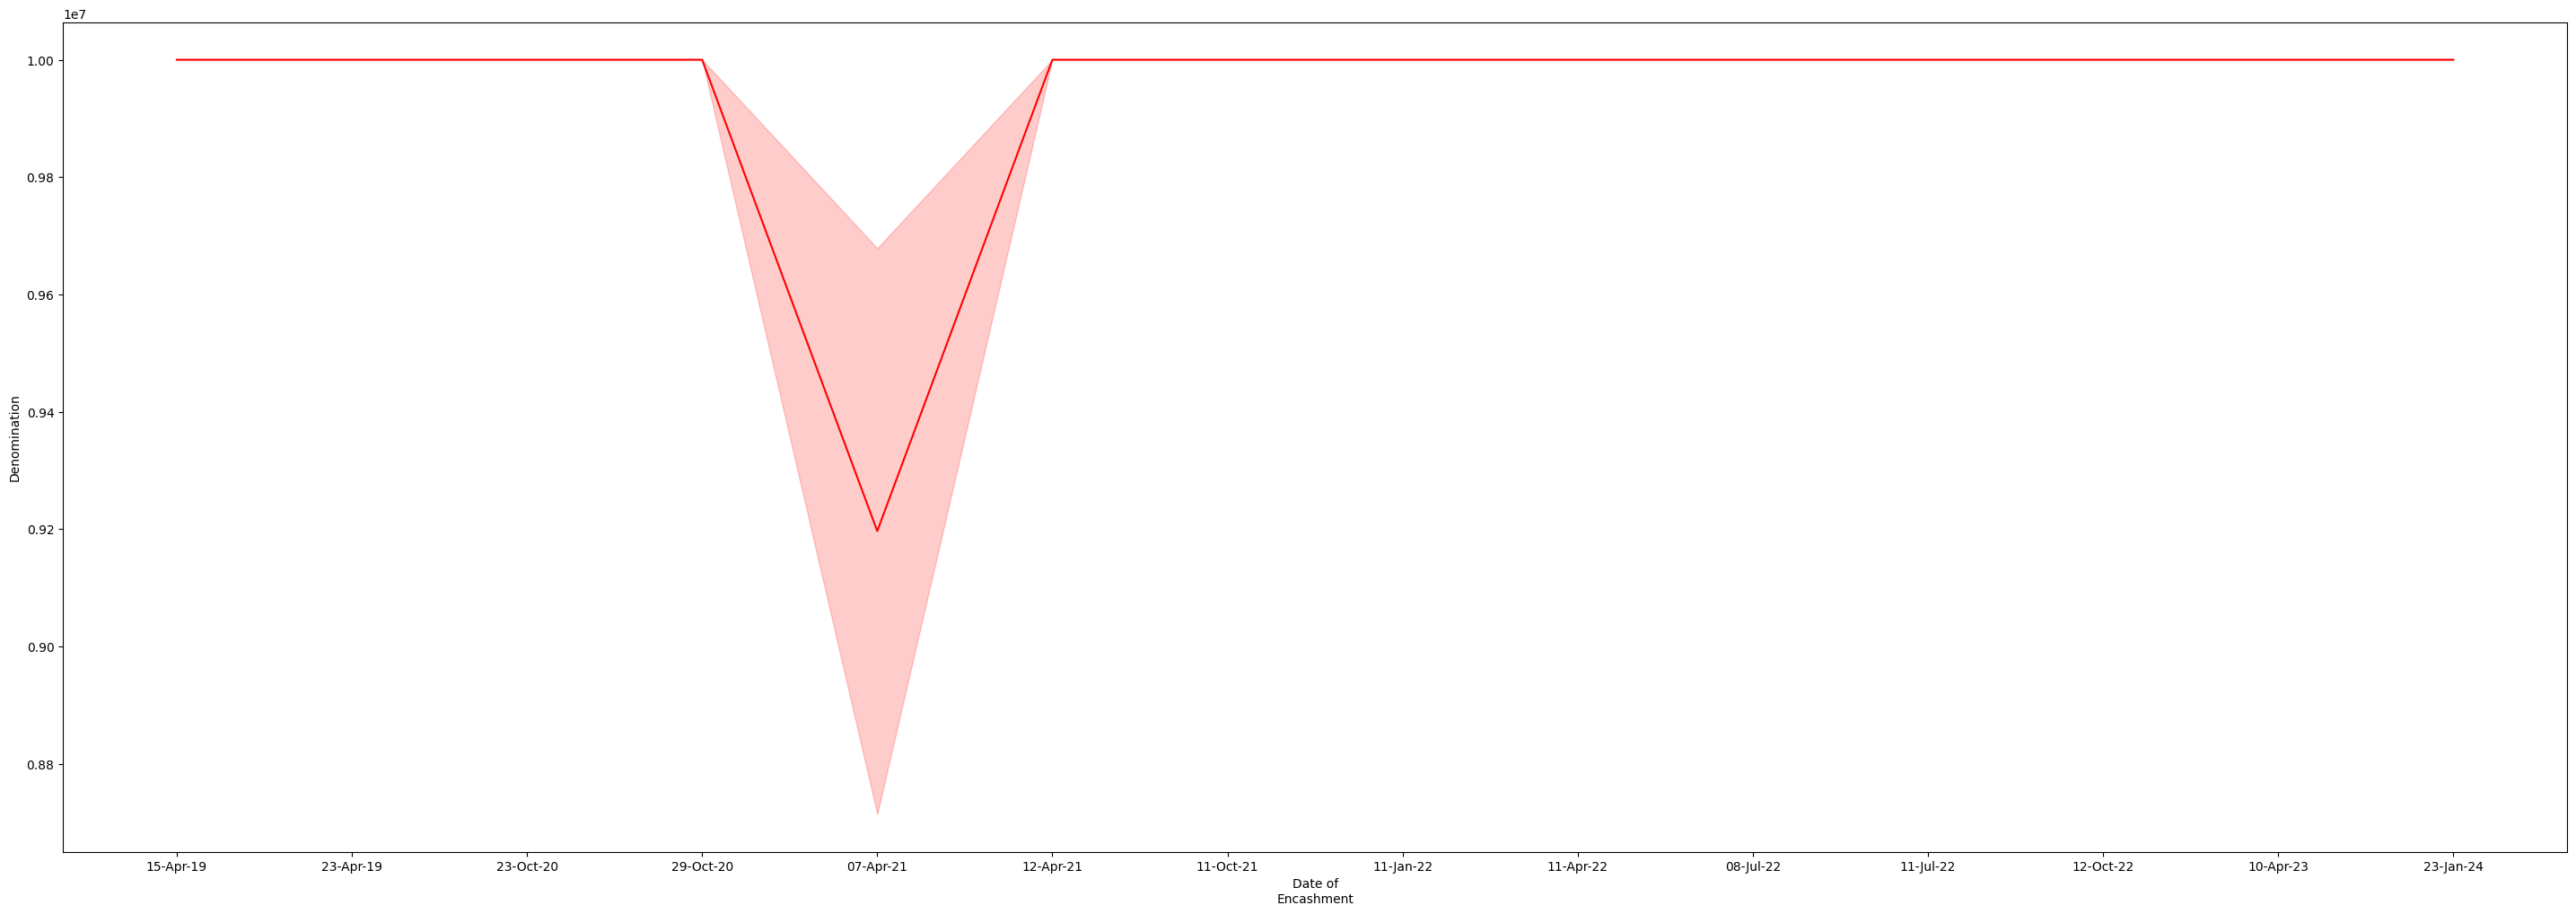

In [79]:
plt.figure(figsize = (36,12))
sn.lineplot(x = "Date of\nEncashment" , y = "Denomination"  , data = data_DMK_PARTY_IN_PARLIAMENT , color = "red")

/tmp/ipykernel_34/2157017522.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data_DMK_PARTY_IN_PARLIAMENT["Denomination"] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Denomination', ylabel='Density'>

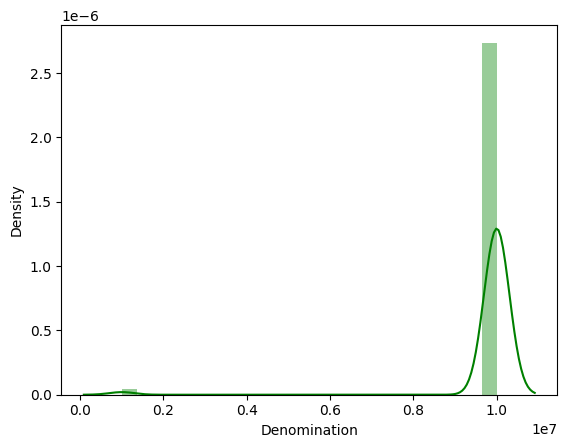

In [84]:
sn.distplot(data_DMK_PARTY_IN_PARLIAMENT["Denomination"] , color = "green") 